<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab3_MW/blob/main/Lab3_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 3  Mechanical Waves

Ebgeny Kolonsky 2024

v.0.1.0

In [ ]:
import numpy as np
from scipy import linalg as LA
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

https://lpsa.swarthmore.edu/MtrxVibe/MatrixAll.html

https://cooperrc.github.io/computational-mechanics/module_05/03_Good_Vibrations.html#./02_Keep_it_steady.ipynb


Constants and parameters

In [ ]:
# single rod
l = 500e-3 # length of rod
d = 3e-3   # diameter of rod
rho = 7850 # kg/m^3 # density of metal
m = np.pi * d**2 * rho / 4 * l # mass of rod
J = m * l**2 / 12 # moment of inertia of rod

# the mechanical wave system
L = 1000e-3 # length of the system
g = 9.8 # grav const
n = 2 # number of elements in rotational oscillations system

# k can be found from static
Fstatic = 1 # newton, force applied to the end of the rod
theta_static = 1 # radian
k = Fstatic * l / 2 / theta_static


Model equations

$$
M_i \ddot{\theta_i}  -k\theta_{i-1} + 2 k \theta_i - k \theta_{i+1} = 0, \quad i = 1 \dots n-1
$$

Boundary conditions

Forced harmonic oscillation
$$
\theta_0(t) = \eta_0 \, e^{i \omega t}
$$

The other end is fixed
$$
\theta_n = 0
$$

Coordinates vector
$$
\Theta =  \begin{bmatrix}
      \theta_1 \\
      \vdots\\
      \theta_n \end{bmatrix} ,
$$

Inertia matrix
$$
M =  \begin{bmatrix}
      M_1 &     \\
       &\ddots & \\
       &            & M_n
      \end{bmatrix} ,
$$
Elastity matrix
$$
K =  \begin{bmatrix}
      2 k &  -k  &  &         \\
      -k  &  2k  & -k &          \\
         & -k   & 2k  & -k &         \\
      & & &\ddots & -k\\
      & &         & -k & 2 k
      \end{bmatrix}
$$

External forces vector
$$
F =  \begin{bmatrix}
      \eta_0 k \\
      \vdots\\
      0 \end{bmatrix} ,
$$

Motion equitaion in matrix form
$$
I \ddot \Theta + K \Theta = F \, e^{i\omega t}
$$

$$
Z = M^{-1}  K
$$
Eigenvalues $\lambda$ are solution of equation
$$
\det |Z - \lambda I| = 0
$$

Eigenfrequencies are squares of eigenvalues
$$
\omega_i^2 = -\lambda_i
$$

$$
\Theta(t) = \sum A_k E_k e^{i \omega_k t}
$$

$$
\Theta(0) = A E, \quad A = \Theta(0) E^{-1}
$$


In [ ]:
K = k * np.diag(np.ones(n) * 2, 0) + \
    np.diag(-np.ones(n-1)   , 1) +  \
    np.diag(-np.ones(n-1)   ,-1)

M = np.diag(np.ones(n) * J)

Z = LA.inv(M) @ K

X0 = np.zeros(n)
X0[0] = 1

lambdas, E = LA.eig(Z)
isort = np.argsort(lambdas.real)
lambdas = lambdas[isort]
E = E[:,isort]
omega = np.sqrt(lambdas)

A = X0 @ LA.inv(E) # amplitudes


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.0, 1.0)

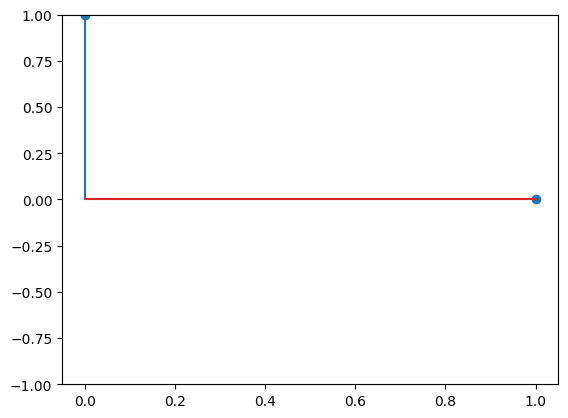

In [ ]:
t = 0
Et = np.array([E[:, k] * np.exp(1j * omega[k] * t) for k in range(n)])
X = A @ Et
plt.stem(X)
plt.ylim(-1,1)

In [ ]:
Et -E

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

array([ 0.        +29.41166393j, 50.94249626 +0.j        ])

In [ ]:
lambdas

array([-865.04597519+0.j, 2595.13792557+0.j])